In [4]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 67)

In [11]:
path="./datasets/"
data_set=[]
for x in os.listdir(path):
    data_set.append(x)

In [12]:
data_set.sort()
len(data_set)

11

In [13]:
# Read in csv as pandas dataframe
data_file=data_set[0]
df=pd.read_csv(path+data_file)
season=data_file.strip('.csv')
print(season)
df.head()

09_10


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,...,SBH,SBD,SBA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,BSH,BSD,BSA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
0,8/15/2009,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,11,14,5,7,15,14,4,6,2,2,0,0,1.67,3.60,5.50,1.65,3.40,5.00,1.67,3.50,5.25,1.7,3.5,...,1.65,3.40,5.0,1.70,3.4,5.50,1.67,3.60,5.50,1.70,3.4,5.0,1.62,3.5,5.5,37,1.72,1.66,3.77,3.51,6.05,5.33,32,2.04,1.92,1.91,1.81,21,0.0,1.28,1.22,4.40,3.99
1,8/15/2009,Blackburn,Man City,0,2,A,0,1,A,M Dean,17,8,9,5,12,9,5,4,2,1,0,0,3.60,3.25,2.10,3.40,3.15,2.00,3.40,3.25,2.10,3.2,3.2,...,3.15,3.25,2.1,3.50,3.2,2.15,3.30,3.25,2.20,3.25,3.2,2.2,3.30,3.2,2.2,38,3.78,3.37,3.35,3.24,2.25,2.12,33,2.15,2.04,1.78,1.71,24,0.0,2.58,2.38,1.60,1.54
2,8/15/2009,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,11,20,3,13,16,10,4,7,2,1,0,0,2.25,3.25,3.25,2.15,3.15,3.15,2.25,3.25,3.10,2.2,3.2,...,2.25,3.20,2.9,2.30,3.2,3.20,2.30,3.25,3.10,2.25,3.2,3.1,2.20,3.2,3.3,38,2.37,2.24,3.31,3.20,3.40,3.15,33,2.25,2.12,1.70,1.66,23,0.0,1.68,1.61,2.33,2.23
3,8/15/2009,Chelsea,Hull,2,1,H,1,1,D,A Wiley,26,7,12,3,13,15,12,4,1,2,0,0,1.17,6.50,21.00,1.17,6.00,13.00,1.20,6.00,15.00,1.2,5.5,...,1.17,5.75,15.0,1.17,6.5,21.00,1.18,6.50,17.00,1.17,6.0,17.0,1.20,5.5,19.0,38,1.20,1.17,7.71,6.26,23.14,16.39,34,1.67,1.58,2.44,2.26,22,0.0,1.03,1.02,17.05,12.96
4,8/15/2009,Everton,Arsenal,1,6,A,0,3,A,M Halsey,8,15,5,9,11,13,4,9,0,0,0,0,3.20,3.25,2.30,2.95,3.15,2.25,3.00,3.25,2.30,3.1,3.1,...,3.00,3.20,2.2,3.20,3.2,2.30,3.25,3.25,2.25,2.90,3.3,2.3,3.25,3.2,2.2,38,3.34,3.07,3.34,3.21,2.42,2.28,34,2.20,2.06,1.77,1.70,24,0.0,2.27,2.20,1.73,1.63


In [14]:
# Create dataframes for match_data and betting_data from the original dataframe
match_data=df.loc[:, 'Date':'AR']
betting_data=df.loc[:,'B365H':]

In [4]:
# Create a dataframe with the referees, result, and number of cards for the match
ref_cards_result=df[['HomeTeam','AwayTeam','FTR','Referee','HF','AF','HY','AY','HR','AR']]
ref_cards_result=ref_cards_result.rename(columns={"HF": "Home Fouls", "AF": "Away Fouls",
                                        "HY":"Home Yellows","AY":"Away Yellows",
                                        "HR":"Home Reds","AR":"Away Reds",
                                        "FTR":"Result"})

In [15]:
# Create separate dataframe for home/away team cards
home_cards=df[['HomeTeam','HY','HR']]
away_cards=df[['AwayTeam','AY','AR']]

In [21]:
# Create an array containing each unique value for clubs and referees both in alphabetical order
clubs=df['HomeTeam'].unique()
clubs.sort()
refs=df['Referee'].unique()
refs.sort()

array(['Arsenal', 'Aston Villa', 'Birmingham', 'Blackburn', 'Bolton',
       'Burnley', 'Chelsea', 'Everton', 'Fulham', 'Hull', 'Liverpool',
       'Man City', 'Man United', 'Portsmouth', 'Stoke', 'Sunderland',
       'Tottenham', 'West Ham', 'Wigan', 'Wolves'], dtype=object)

In [7]:
# Create empty arrays for w-l-d and yellow/red cards
yellow_cards=np.array([0 for _ in range(0,len(refs))])
red_cards=np.array([0 for _ in range(0,len(refs))])
club_wins=np.array([0 for _ in range(20)])
club_losses=np.array([0 for _ in range(20)])
club_draws=np.array([0 for _ in range(20)])
club_points=np.array([0 for _ in range(20)])
club_yellows=np.array([0 for _ in range(20)])
club_reds=np.array([0 for _ in range(20)])

In [8]:
# Determine how many yellow cards were given by each referee
for i in range(len(ref_cards_result['Home Yellows'])):
    match_ref=ref_cards_result['Referee'][i]
    ref_index=np.where(refs==match_ref)
    yellow_cards[ref_index]+=ref_cards_result['Home Yellows'][i]
    
for i in range(len(ref_cards_result['Away Yellows'])):
    match_ref=ref_cards_result['Referee'][i]
    ref_index=np.where(refs==match_ref)
    yellow_cards[ref_index]+=ref_cards_result['Away Yellows'][i]

In [9]:
# Determine how many red cards were given by each referee
for i in range(len(ref_cards_result['Home Reds'])):
    match_ref=ref_cards_result['Referee'][i]
    ref_index=np.where(refs==match_ref)
    red_cards[ref_index]+=ref_cards_result['Home Reds'][i]
    
for i in range(len(ref_cards_result['Away Reds'])):
    match_ref=ref_cards_result['Referee'][i]
    ref_index=np.where(refs==match_ref)
    red_cards[ref_index]+=ref_cards_result['Away Reds'][i]

In [10]:
for i in range(len(ref_cards_result['Result'])):
        # Aggregate yellow and red cards by club for home club
        home_team=ref_cards_result['HomeTeam'][i]
        club_index=np.where(clubs==home_team)
        club_yellows[club_index]+=ref_cards_result['Home Yellows'][i]
        club_reds[club_index]+=ref_cards_result['Home Reds'][i]
        
        # Aggregate yellow and red cards by club for away club
        away_team=ref_cards_result['AwayTeam'][i]
        club_index=np.where(clubs==away_team)
        club_yellows[club_index]+=ref_cards_result['Away Yellows'][i]
        club_reds[club_index]+=ref_cards_result['Away Reds'][i]

In [11]:
# # Create an empty dict to hold each referees match record for each club
# match_record={}
# for i in range(0,len(refs)):
#     match_record[refs[i]] = []
    
# match_record

# for i in range(len(ref_cards_result['Result'])):
#     match_ref=ref_cards_result['Referee'][i]
#     ref_index=np.where(refs==match_ref)
#     print(match_record[refs[ref_index]])
# #     home_team=ref_cards_result['HomeTeam'][i]
# #     club_index=np.where(clubs==home_team)
# #     match_record[refs[ref_index]].append(ref_cards_result['Home Yellows'][i])
   
# #     away_team=ref_cards_result['AwayTeam'][i]
# #     club_index=np.where(clubs==away_team)
# #     match_record[refs[ref_index]].append(ref_cards_result['Away Yellows'][i])

# match_record

In [12]:
# Print out the records for each club
most_yellows=clubs[np.where(club_yellows==max(club_yellows))]
most_reds=clubs[np.where(club_reds==max(club_reds))]
print("The club with the most yellow cards is",most_yellows[0])
print("The club with the most red cards is",most_reds[0])

The club with the most yellow cards is Aston Villa
The club with the most red cards is Sunderland


In [13]:
# Test number of cards given per club for normality using scipy
alpha=0.05

# Yellow card test
k2,p=stats.normaltest(club_yellows)
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The distribution of yellow cards is not assumed to be normally distributed")
else:
    print("The distribution of yellow cards is assumed to be normally distributed")
    
# Red card test
k2,p=stats.normaltest(club_reds)
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The distribution of red cards is not assumed to be normally distributed")
else:
    print("The distribution of red cards is assumed to be normally distributed")

The distribution of yellow cards is assumed to be normally distributed
The distribution of red cards is assumed to be normally distributed


In [31]:
print(stats.normaltest(club_reds))
k2,p=stats.normaltest(club_reds)
print("p:",p,"k2",k2)

NormaltestResult(statistic=1.4715437195492223, pvalue=0.4791354907995493)
p: 0.4791354907995493 k2 1.4715437195492223


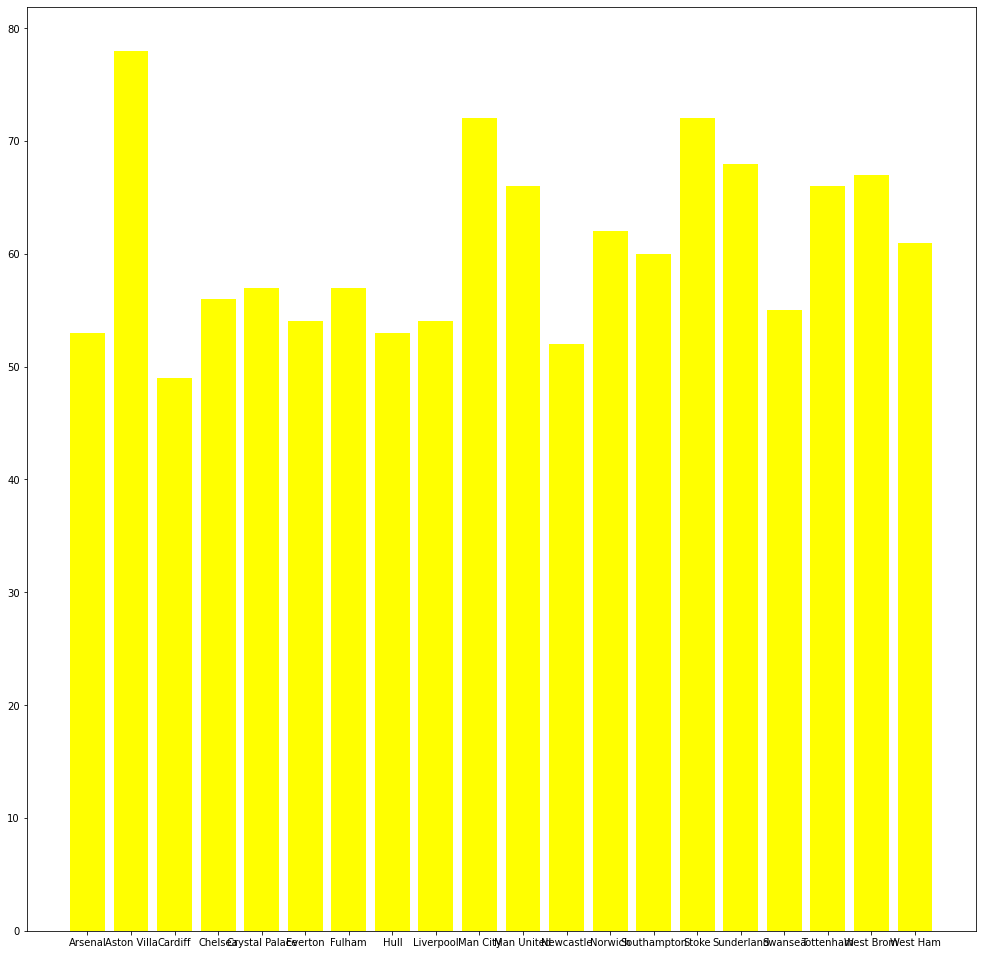

In [14]:
fig = plt.figure(figsize =(17, 17))
plt.bar(clubs, club_yellows, color='yellow')
plt.show()

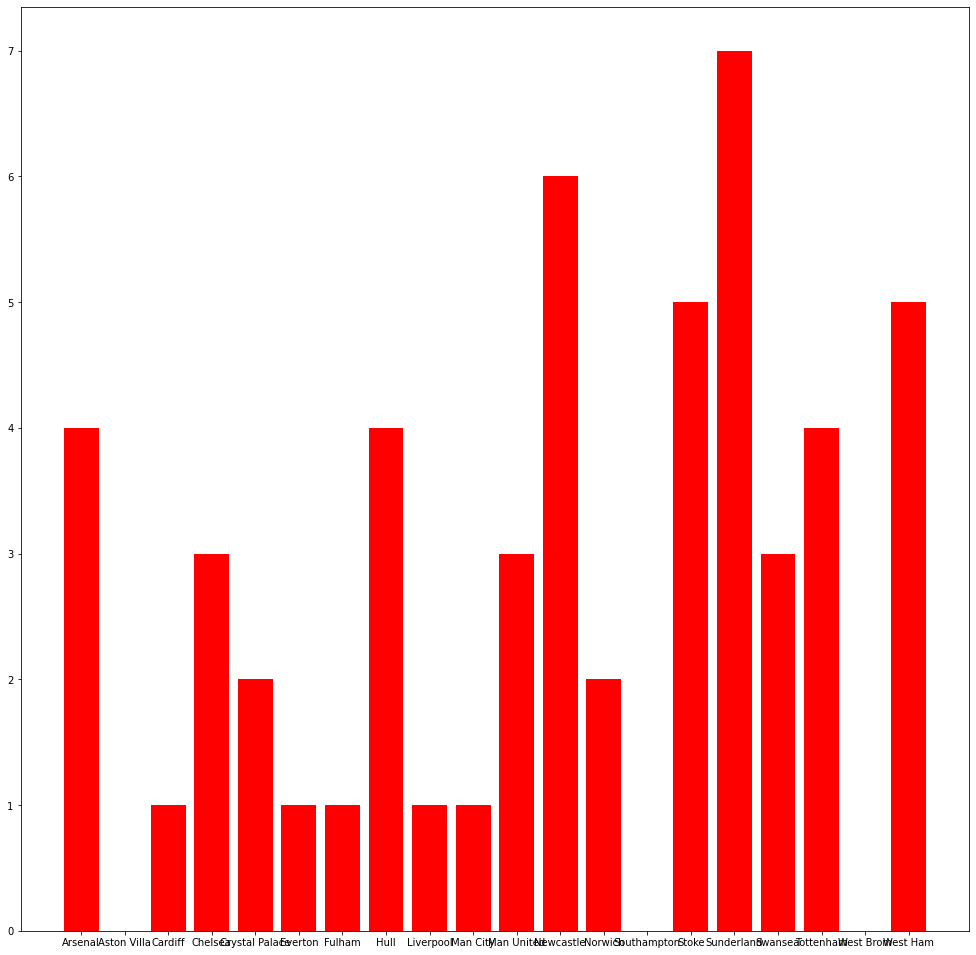

In [15]:
fig = plt.figure(figsize =(17, 17))
plt.bar(clubs,club_reds,color='red')
plt.show()

### Cards given by referees

In [16]:
# Test number of cards given by referee for normality
alpha=0.05

# Yellow card test
k2,p=stats.normaltest(yellow_cards)
if p < alpha:  
    print("The distribution of yellow cards by referee is not assumed to be normally distributed")
else:
    print("The distribution of yellow cards by referee is assumed to be normally distributed")
    
# Red card test
k2,p=stats.normaltest(red_cards)
if p < alpha:  
    print("The distribution of red cards by referee is not assumed to be normally distributed")
else:
    print("The distribution of red cards by referee is assumed to be normally distributed")

The distribution of yellow cards by referee is assumed to be normally distributed
The distribution of red cards by referee is assumed to be normally distributed


C:\Users\barre\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


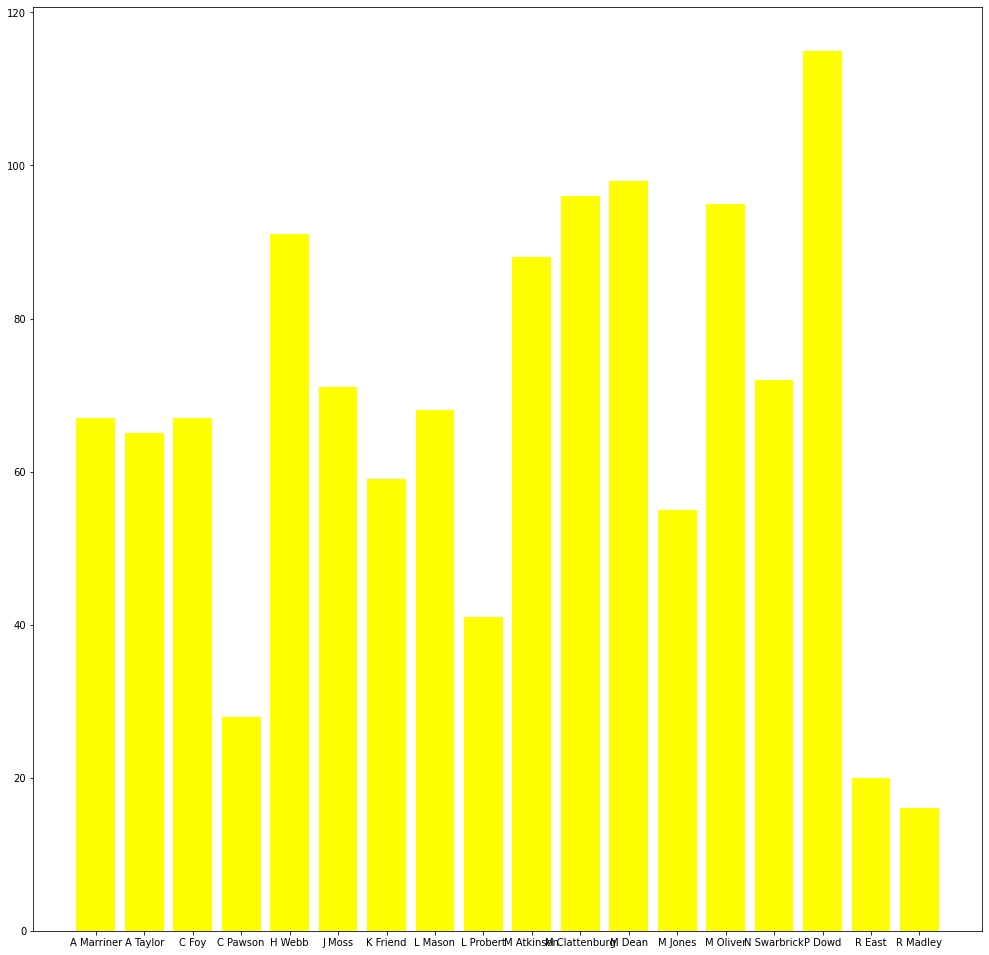

In [17]:
fig = plt.figure(figsize =(17, 17))
plt.bar(refs, yellow_cards, color='yellow')
plt.show()

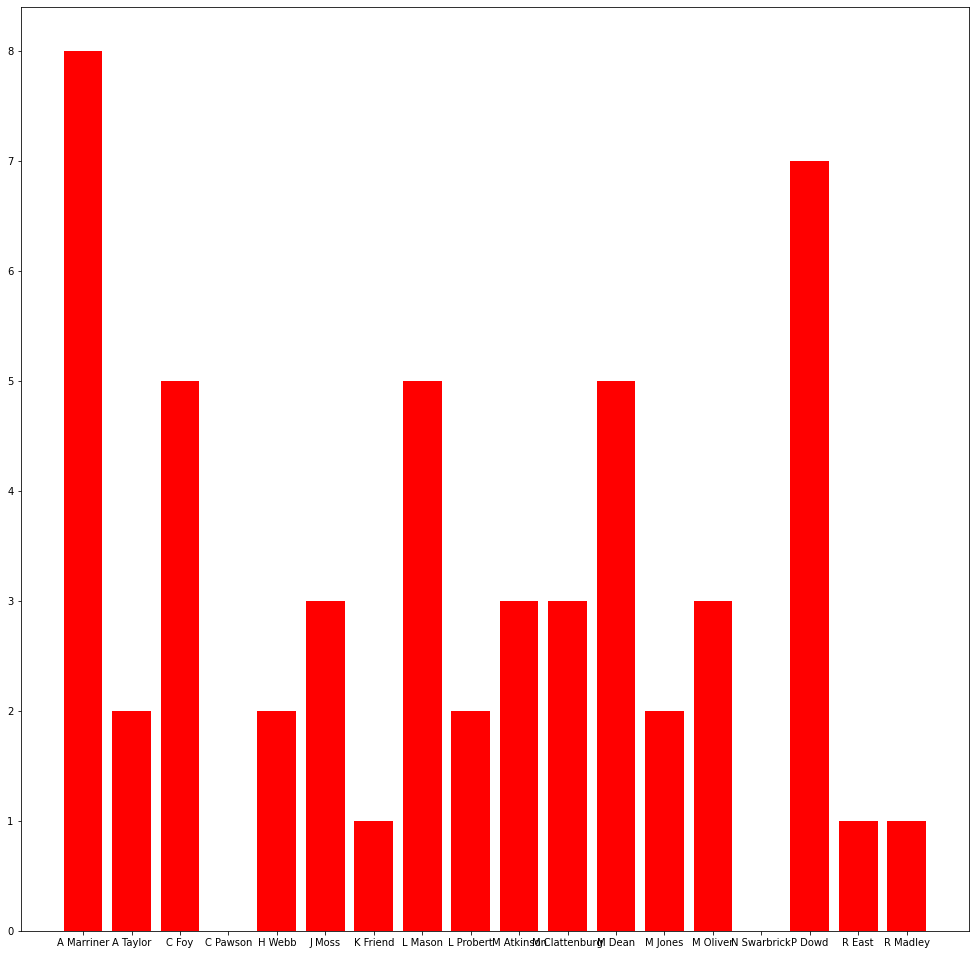

In [18]:
fig = plt.figure(figsize =(17, 17))
plt.bar(refs,red_cards,color='red')
plt.show()

In [19]:
# Aggregate cards given per club per referee
for i in range(len(ref_cards_result['Result'])):
        # Aggregate yellow and red cards by club for home club
        home_team=ref_cards_result['HomeTeam'][i]
        club_index=np.where(clubs==home_team)
        club_yellows[club_index]+=ref_cards_result['Home Yellows'][i]
        club_reds[club_index]+=ref_cards_result['Home Reds'][i]
        
        # Aggregate yellow and red cards by club for away club
        away_team=ref_cards_result['AwayTeam'][i]
        club_index=np.where(clubs==away_team)
        club_yellows[club_index]+=ref_cards_result['Away Yellows'][i]
        club_reds[club_index]+=ref_cards_result['Away Reds'][i]

### Club statistics

In [20]:
# Count matches won and lost by club
for i in range(len(ref_cards_result['Result'])):
    # Get winner of match
    result=ref_cards_result['Result'][i]
    
    # If Away team wins
    if result=='A':
        # Increase Away club win column by 1
        club=ref_cards_result['AwayTeam'][i]
        club_index=np.where(clubs==club)
        club_wins[club_index]+=1
        club_points[club_index]+=3
        
        # Increase Home clubs loss column by 1
        club=ref_cards_result['HomeTeam'][i]
        club_index=np.where(clubs==club)
        club_losses[club_index]+=1
    # If Home team wins
    elif result=='H':
        # Increase Home club win column by 1
        club=ref_cards_result['HomeTeam'][i]
        club_index=np.where(clubs==club)
        club_wins[club_index]+=1
        club_points[club_index]+=3
        
        # Increase Away club loss column by 1
        club=ref_cards_result['AwayTeam'][i]
        club_index=np.where(clubs==club)
        club_losses[club_index]+=1
        
# Calculate number of times a club drew
for i in range(0,len(club_wins)):
    if club_wins[i]+club_losses[i]<38:
        club_draws[i]=38-(club_wins[i]+club_losses[i])
        club_points[i]+=club_draws[i]

In [21]:
# Get bottom 3 clubs
idx=np.argpartition(club_points,3)

# Print bottom 3 clubs
for i in range(0,3):
    print(clubs[idx[i]])

Cardiff
Fulham
Norwich


In [22]:
# Get league winner
first_place=clubs[np.where(club_points==max(club_points))]
print(first_place[0])

Man City


In [23]:
# Test distribution of club_wins for normality
k2,p=stats.normaltest(club_wins)
if p < alpha:  
    print("The distribution of wins by club is not assumed to be normally distributed")
else:
    print("The distribution of wins by club is assumed to be normally distributed")

The distribution of wins by club is assumed to be normally distributed


In [24]:
# Test distribution of club_draws for normality
k2,p=stats.normaltest(club_draws)
if p < alpha:  
    print("The distribution of draws by club is not assumed to be normally distributed")
else:
    print("The distribution of draws by club is assumed to be normally distributed")

The distribution of draws by club is not assumed to be normally distributed


In [25]:
# Test distribution of club_draws for normality
avg_draws=np.average(club_draws)
k2,p=stats.ttest_1samp(club_draws,avg_draws)

# if p < alpha:  
#     print("The distribution of draws by club is not assumed to be normally distributed")
# else:
#     print("The distribution of draws by club is assumed to be normally distributed")

In [26]:
# Test distribution of club_losses for normality
k2,p=stats.normaltest(club_losses)
if p < alpha:  
    print("The distribution of losses by club is not assumed to be normally distributed")
else:
    print("The distribution of losses by club is assumed to be normally distributed")

The distribution of losses by club is assumed to be normally distributed


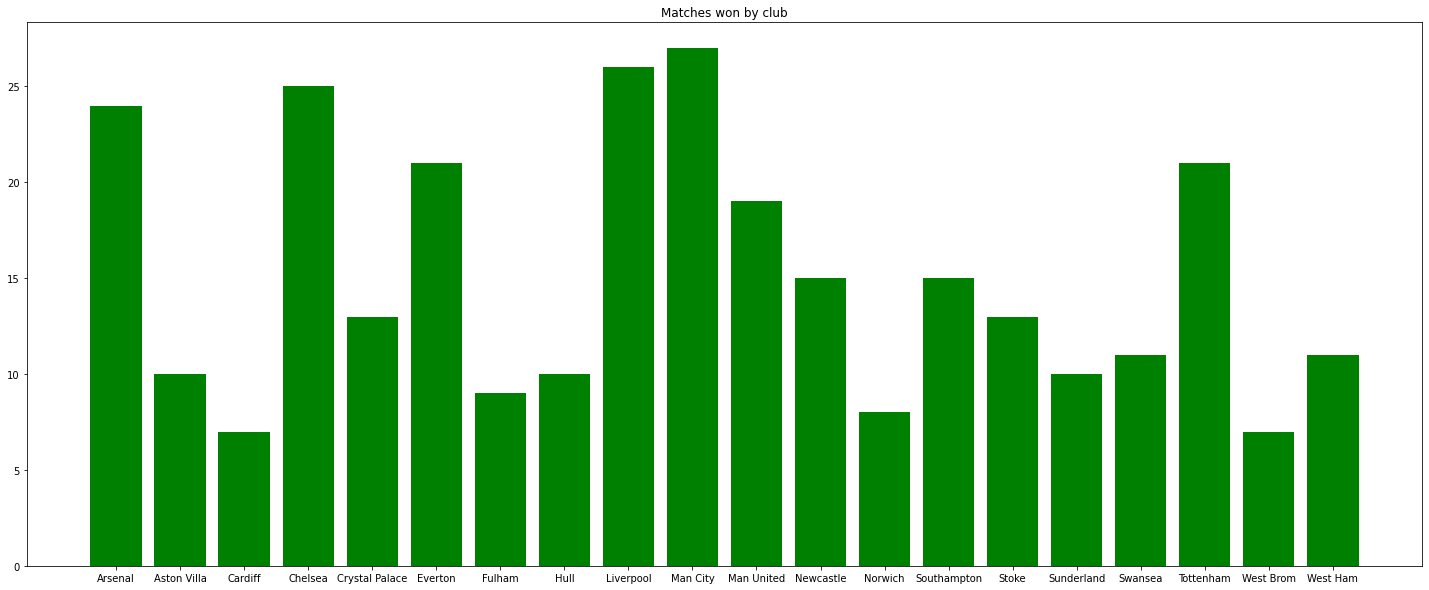

In [27]:
fig = plt.figure(figsize =(25, 10))
plt.bar(clubs, club_wins, color='green')
plt.title("Matches won by club")
plt.show()

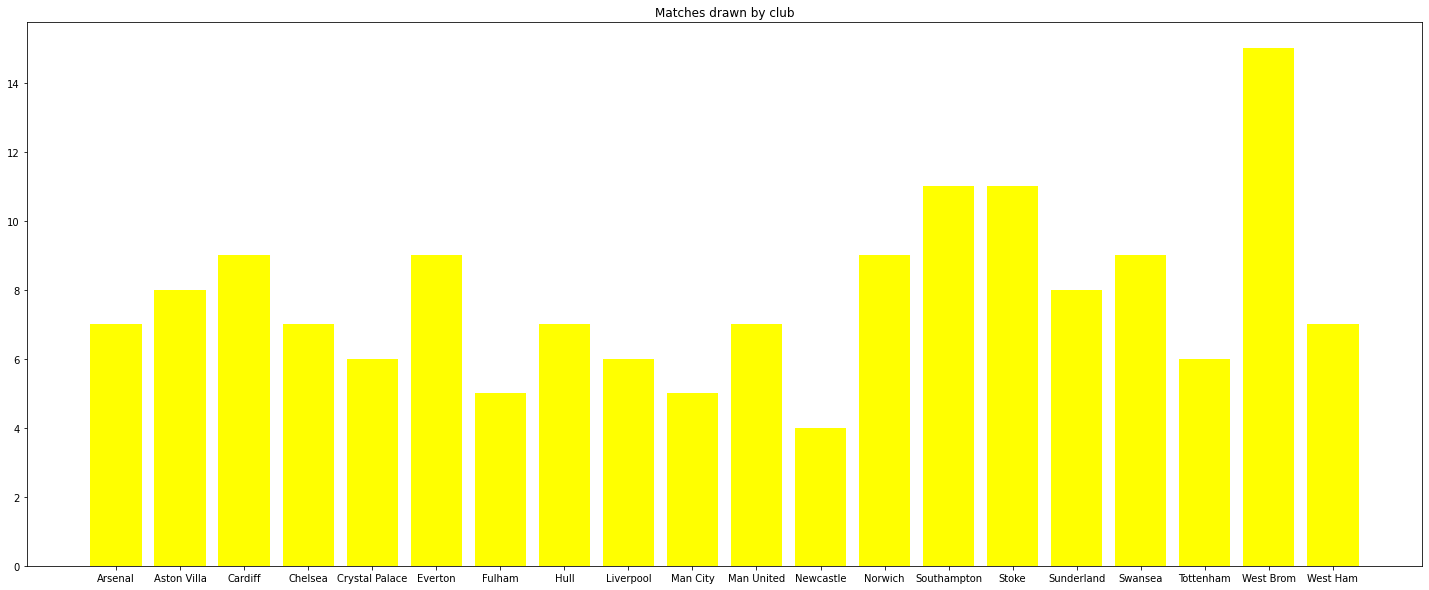

In [28]:
fig = plt.figure(figsize =(25, 10))
plt.bar(clubs, club_draws, color='yellow')
plt.title("Matches drawn by club")
plt.show()

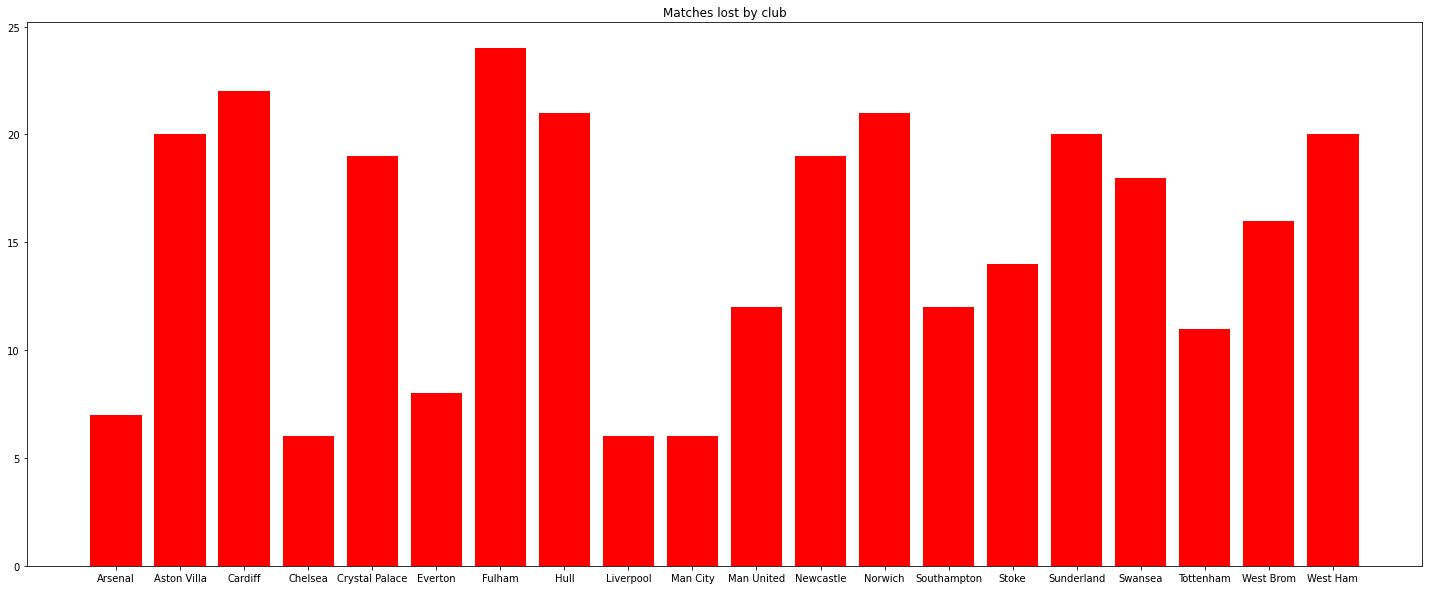

In [29]:
fig = plt.figure(figsize =(25, 10))
plt.bar(clubs, club_losses, color='red')
plt.title("Matches lost by club")
plt.show()